In [3]:
from struct import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load in HR file

In [5]:
!ls DATA

Add_Diagnoses_Cols.ipynb	    JSONs
add_med_columns.py		    KullbackLeibler.png
build_tree_MED_DX_100_min_leaf.out  old
build_tree.py			    Pickles
build_tree.pyc			    process_HR.py
Create_HR_Distribution.ipynb	    process_HR.py.lprof
DATA				    Read HR Files.ipynb
Decision Tree Algorithm.ipynb	    README.md
export_tree_json.py		    sameh_dateoffset.csv
extra				    sameh_dx_all.xlsx
Format_Dems_Meds_Blocks.ipynb	    Scratchpad.ipynb
HR_process.pyc			    tree_viz_format_6_100.json
icd9				    Visualize_Tree.ipynb


In [46]:
with open('DATA/March2013Data/SA90200020406974/11NICU_8-SA90200075892394/SA90200075892394_20150830115318_1509_HR.vital', 'rb') as f:
    full = f.read()
    fmt = "16s8s8s4siiiiid"
    data_len = (len(full) - calcsize(fmt))/8
    fmt = fmt + str(data_len) + "d"
    full_data = unpack(fmt,full)
    name, uom, unit, bed, year, month, day, hour, minute, second, data = full_data[0], \
                                                                    full_data[1], \
                                                                    full_data[2],\
                                                                    full_data[3],\
                                                                    full_data[4],\
                                                                    full_data[5],\
                                                                    full_data[6],\
                                                                    full_data[7],\
                                                                    full_data[8],\
                                                                    full_data[9],\
                                                                    full_data[10:]
    del full_data
#     print data
    f.close()
    data = np.reshape(list(data), (4, len(data)/4), order = 'F')
    vital_val = data[0, :]
    vital_offset = data[1,:]
    vital_limitLo = data[2,:]
    vital_limitHi = data[3,:]

In [47]:
from datetime import datetime, timedelta

In [48]:
start = datetime(int(year), int(month), int(day), int(hour), int(minute), int(second))

In [49]:
SA90200020406974
start

datetime.datetime(2013, 3, 5, 12, 54, 46)

In [28]:
vital_time = [start + timedelta(seconds = x) for x in vital_offset]

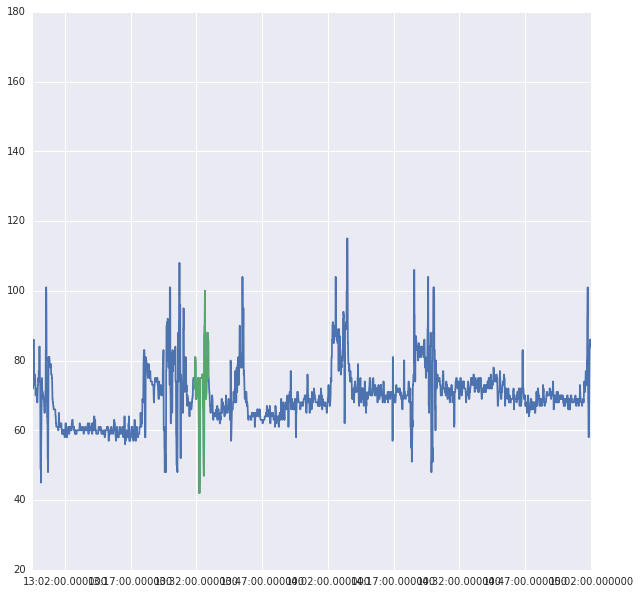

In [34]:
plt.figure(figsize=(10,10))

plt.ylim((20, 180))
plt.plot(vital_time, vital_val)
plt.plot(vital_time[1100:1200], vital_val[1100:1200])
# plt.plot(vital_time[21600+60*60:21600+60*60 + 60*60], vital_val[21600+60*60:21600+60*60 + 60*60])

In [37]:
time_formatted = [x.strftime("%Y-%m-%d %H:%M:%S") for x in vital_time[1100:1200]]

In [44]:
# sample_HR = zip(time_formatted, vital_val[1100:1200])
sample_HR_offset = zip(vital_offset[1100:1200], vital_val[1100:1200])

In [45]:
import pandas as pd
# pd.DataFrame(sample_HR, columns = ['Time', "Heart_Rate"]).to_csv('sample_HR_for_viz.csv')
pd.DataFrame(sample_HR_offset, columns = ['Time', "Heart_Rate"]).to_csv('sample_HR_for_viz_OFFSET.csv')

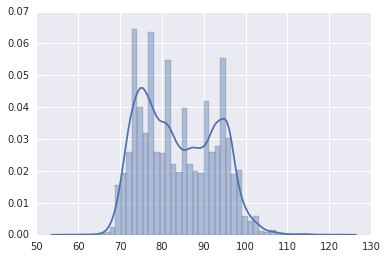

In [98]:
##Dist of HR
sns.distplot(vital_val)

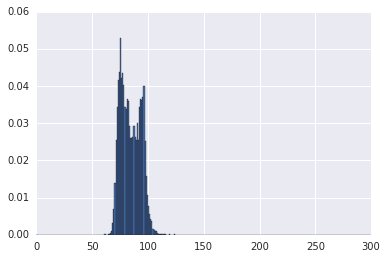

In [174]:
prob, bins, patches = plt.hist(vital_val, 
                               bins = 300, 
                               range = (0, 300),
                                normed = True, 
                               stacked = True)

#### Random distribution of heart rates

In [240]:
from numpy import random
vital_val_rand = random.randint(120, 139, 4000)

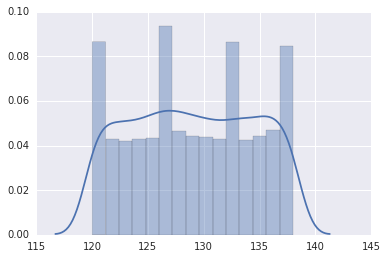

In [241]:
sns.distplot(vital_val_rand)

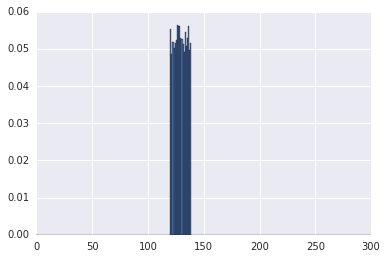

In [243]:
prob_rand, bins_rand, patches_rand = plt.hist(vital_val_rand, 
                                     bins = 300, 
                                     range = (0, 300),
                                     normed = True, stacked = True)

#### Shift vitals

In [ ]:
vitals_val_shift = vital_val + 5

In [ ]:
sns.distplot(vital_val_shift)

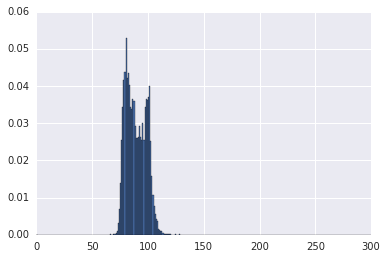

In [245]:
prob_shift, bins_shift, patches_shift = plt.hist(vitals_val_shift, 
                                     bins = 300, 
                                     range = (0, 300),
                                     normed = True, stacked = True)

NameError: name 'prob_rand' is not defined

### Average Distribution

In [247]:
prob_AVG = (prob_rand + prob + prob_shift)/3

<Container object of 300 artists>

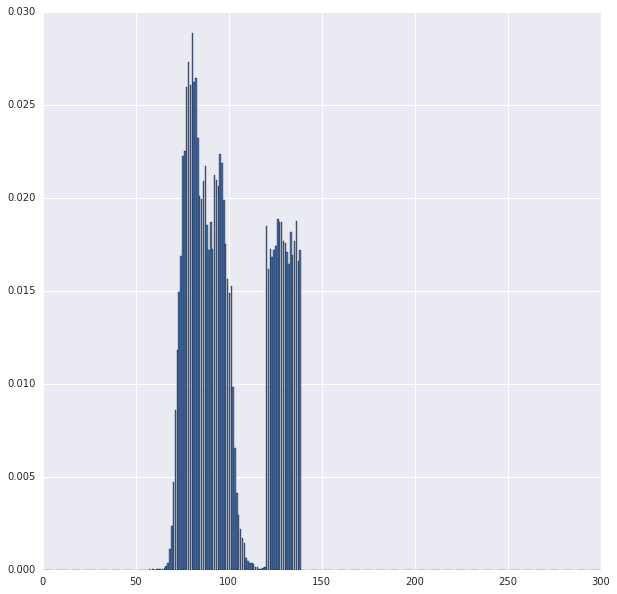

In [250]:
plt.figure(figsize = (10,10))
plt.bar(range(0,300), prob_AVG)

In [254]:
# total = np.append(vital_val, vitals_val_shift)
# total = np.append(total, vital_val_new)

In [255]:
# prob_avg, bins_avg, patches_avg = plt.hist(total, 
#                                      bins = 300, 
#                                      range = (0, 300),
#                                      normed = True, stacked = True)

### Sample Entropies

In [237]:
from scipy import stats

In [251]:
## ORIGINAL with P avg of shifted + orig + random
stats.entropy(prob, prob_AVG)

0.48179440201769408

In [252]:
## SHIFTED with P avg of shifted + orig + random 
stats.entropy(prob_shift, prob_AVG)

0.49753317236102867

In [253]:
## RANDOM with P avg of shifted + orig + random 
stats.entropy(prob_rand, prob_AVG)

1.0977470474956457